In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')


In [15]:
startup_data=pd.read_csv('50_Startups.csv')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [16]:
startup_data.rename(columns={'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'},inplace=True)

In [17]:
startup_data.shape

(50, 5)

In [18]:
startup_data.isnull().sum()

RDS       0
ADM       0
MS        0
State     0
Profit    0
dtype: int64

In [19]:
startup_data.describe()

,RDS,ADM,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [20]:
startup_data.dtypes

RDS       float64
ADM       float64
MS        float64
State      object
Profit    float64
dtype: object

In [34]:
startup_data.drop('State',axis=1,inplace=True)

### Assumption Test
##### 1.Normality test using distplot and probplot

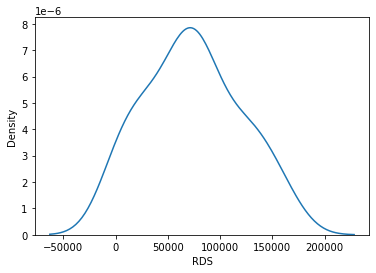

In [21]:
sns.distplot(startup_data['RDS'],hist=False)
plt.show()

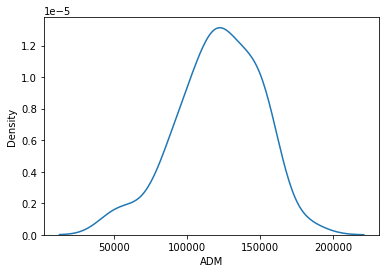

In [22]:
sns.distplot(startup_data['ADM'],hist=False)
plt.show()

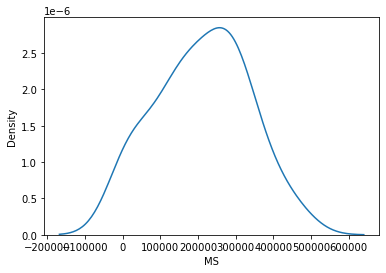

In [23]:
sns.distplot(startup_data['MS'],hist=False)
plt.show()

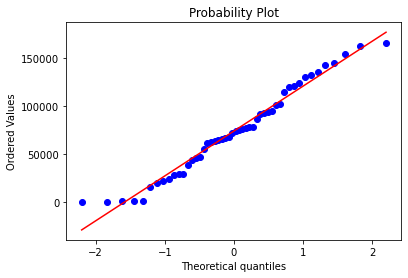

In [24]:
stats.probplot(startup_data['RDS'],dist='norm',plot=plt)
plt.show()

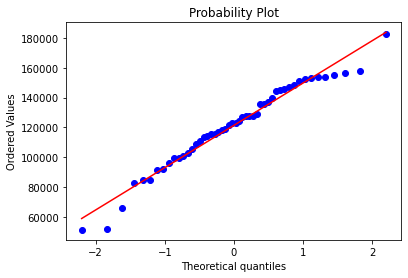

In [25]:
stats.probplot(startup_data['ADM'],dist='norm',plot=plt)
plt.show()

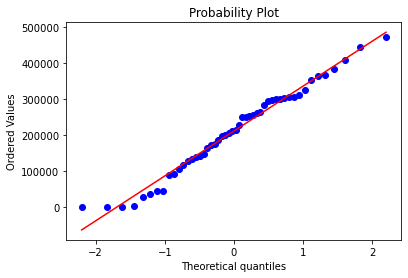

In [26]:
stats.probplot(startup_data['MS'],dist='norm',plot=plt)
plt.show()

### Normality test passed

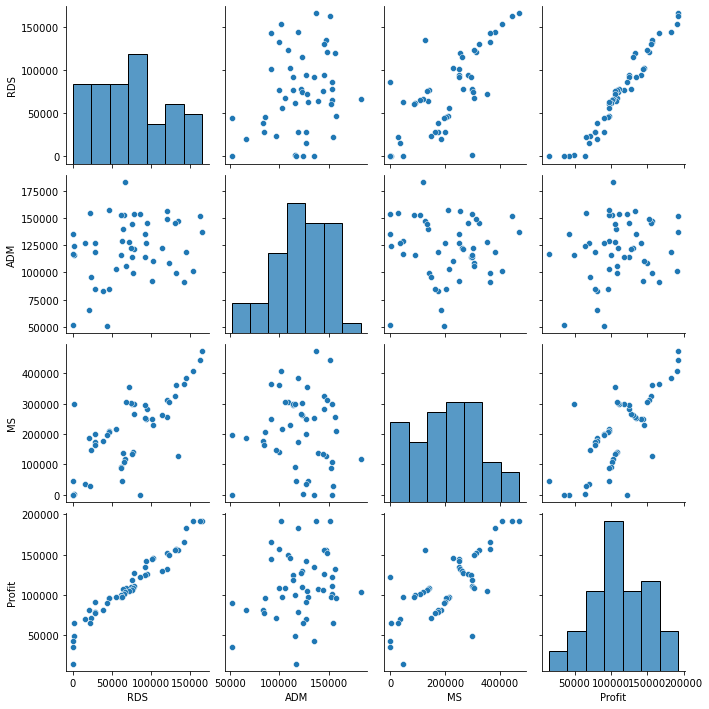

In [27]:
sns.pairplot(startup_data)
plt.show()

### Collinearity Test 

In [30]:
corr_matrix=startup_data.corr().round(2)
corr_matrix

,RDS,ADM,MS,Profit
RDS,1.00,0.24,0.72,0.97
ADM,0.24,1.00,-0.03,0.20
MS,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


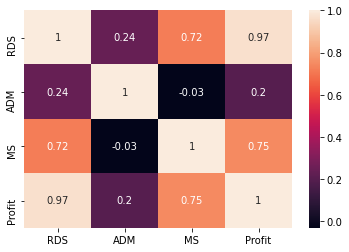

In [32]:
sns.heatmap(corr_matrix,annot=True)
plt.show()


### Model Building

In [53]:
x=startup_data.drop('Profit',axis=1)
y=startup_data[['Profit']]

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(x)

In [55]:
scaled_x=pd.DataFrame(data=scaled_x,columns=['rds','adm','ms'])

In [56]:
scaled_x.mean()

rds    1.199041e-16
adm   -2.919887e-16
ms    -9.325873e-17
dtype: float64

In [57]:
scaled_x.std()

rds    1.010153
adm    1.010153
ms     1.010153
dtype: float64

In [58]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=0.20,random_state=12)

In [60]:
x_train.shape,y_train.shape

((40, 3), (40, 1))

In [61]:
x_test.shape,y_test.shape

((10, 3), (10, 1))

### Model Training

In [62]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

### Model Testing

In [63]:
y_pred_train=linear_model.predict(x_train)
y_pred_test=linear_model.predict(x_test)

### Model Evaluation

In [64]:
from sklearn.metrics import mean_squared_error,r2_score

In [65]:
mean_squared_error(y_train,y_pred_train)

82418806.17198442

In [66]:
mean_squared_error(y_test,y_pred_test)

69164516.23450823

In [67]:
r2_score(y_train,y_pred_train)

0.9485205028772792

In [68]:
r2_score(y_test,y_pred_test)

0.9497398332848893

In [69]:
lin_model1=smf.ols(formula='Profit~ADM',data=startup_data).fit()

In [70]:
lin_model1.params

Intercept    76974.471305
ADM              0.288749
dtype: float64

In [71]:
lin_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.162
Time:                        21:25:57   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADM            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### ADM has in significant values

In [72]:
lin_model2=smf.ols(formula='Profit~MS',data=startup_data).fit()

In [73]:
lin_model2.params

Intercept    60003.548816
MS               0.246459
dtype: float64

In [74]:
lin_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        21:26:49   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### MS has significant values

In [75]:
lin_model3=smf.ols(formula='Profit~ADM+MS',data=startup_data).fit()

In [76]:
lin_model3.params

Intercept    20224.429059
ADM              0.323673
MS               0.248844
dtype: float64

In [77]:
lin_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.50e-10
Time:                        21:27:22   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADM            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Here both ADM and MS have significant values

### Model Validation Techniques 
**1.Variance Influence Factor**


In [84]:
reg_rds=smf.ols(formula='RDS~ADM+MS',data=startup_data).fit().rsquared
vif_rds=1/(1-reg_rds)
vif_rds

2.468903069994701

In [85]:
reg_adm=smf.ols(formula='ADM~RDS+MS',data=startup_data).fit().rsquared
vif_adm=1/(1-reg_adm)
vif_adm

1.175091007055045

In [86]:
reg_ms=smf.ols(formula='MS~RDS+ADM',data=startup_data).fit().rsquared
vif_ms=1/(1-reg_ms)
vif_ms

2.3267732905308773

In [87]:
vif_table=pd.DataFrame({'feature':['RDS','ADM','MS'],'VIF':[vif_rds,vif_adm,vif_ms]})
vif_table

,feature,VIF
0,RDS,2.468903
1,ADM,1.175091
2,MS,2.326773


### Above VIF values  are less than 5.it indicates low correlation between them

### Model Deletion/Outlier Detection 
**Cook's Distance**

In [103]:
influence=model1.get_influence()
cooks,_=influence.cooks_distance

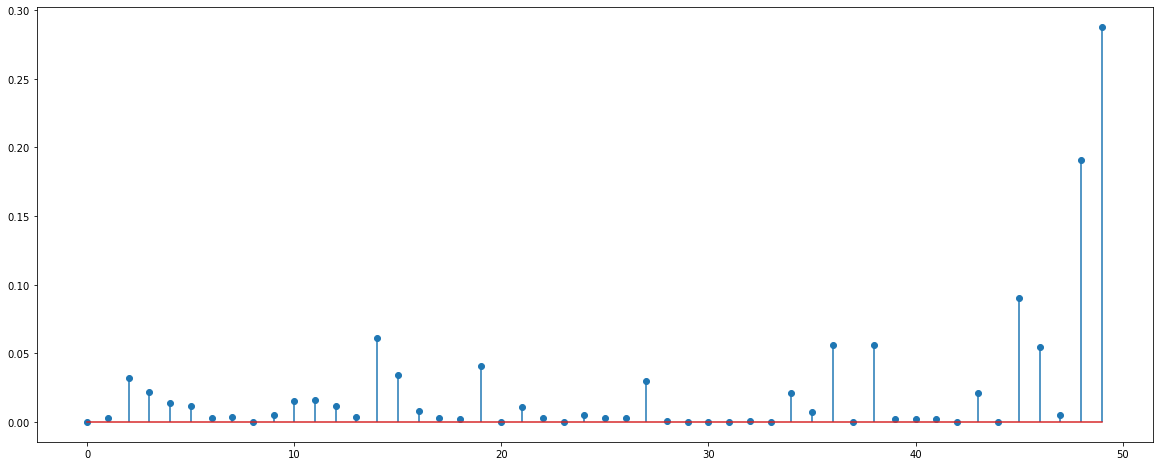

In [105]:
plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(startup_data)),np.round(cooks,3))
plt.show()

In [109]:
np.argmax(cooks),np.max(cooks)

(49, 0.2880822927543267)

above output indicates 49th is the outlier in data with cook's distance 0.28


### Influence Plot

In [114]:
from statsmodels.graphics.regressionplots import influence_plot

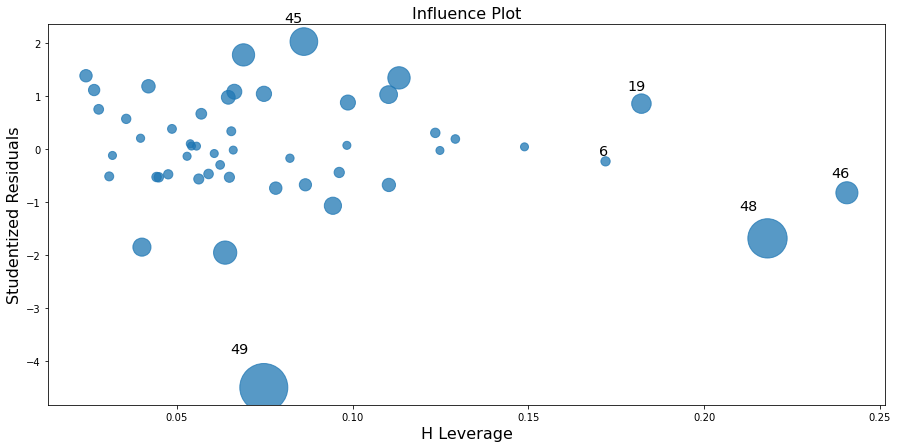

In [123]:
fig,ax=plt.subplots(figsize=(15,7))
influence_plot(model1,ax=ax)
plt.show()

In [80]:
startup_new=startup_data.copy()

In [81]:
startup_new=startup_data.drop(startup_data.index[49]).reset_index()

In [82]:
startup_new

,index,RDS,ADM,MS,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


### Final Model Building


In [88]:
final_model=smf.ols(formula='Profit~RDS+MS',data=startup_new).fit()

In [89]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     568.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           3.74e-33
Time:                        21:29:37   Log-Likelihood:                -506.43
No. Observations:                  49   AIC:                             1019.
Df Residuals:                      46   BIC:                             1025.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.979e+04   2341.584     21.261      0.000    4.51e+04    5.45e+04
RDS            0.7754      0.035     22.136      0.000       0.705       0.846
MS             0.0274      0.013      2.104      0.041       0.001       0.054
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.273
Skew:                          -0.051   Prob(JB):                        0.872
Kurtosis:                       2.649   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
final_model.rsquared

0.9613162435129847

### Inference
**1.Administration feature is  dropped,because it makes the AIC value higher and does not contribute over result**
    
  **2.Improved final model gives 96% accuracy after removing detected outliers**